First, we start off with importing any necessary libraries. 

In [2]:

import cv2 
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

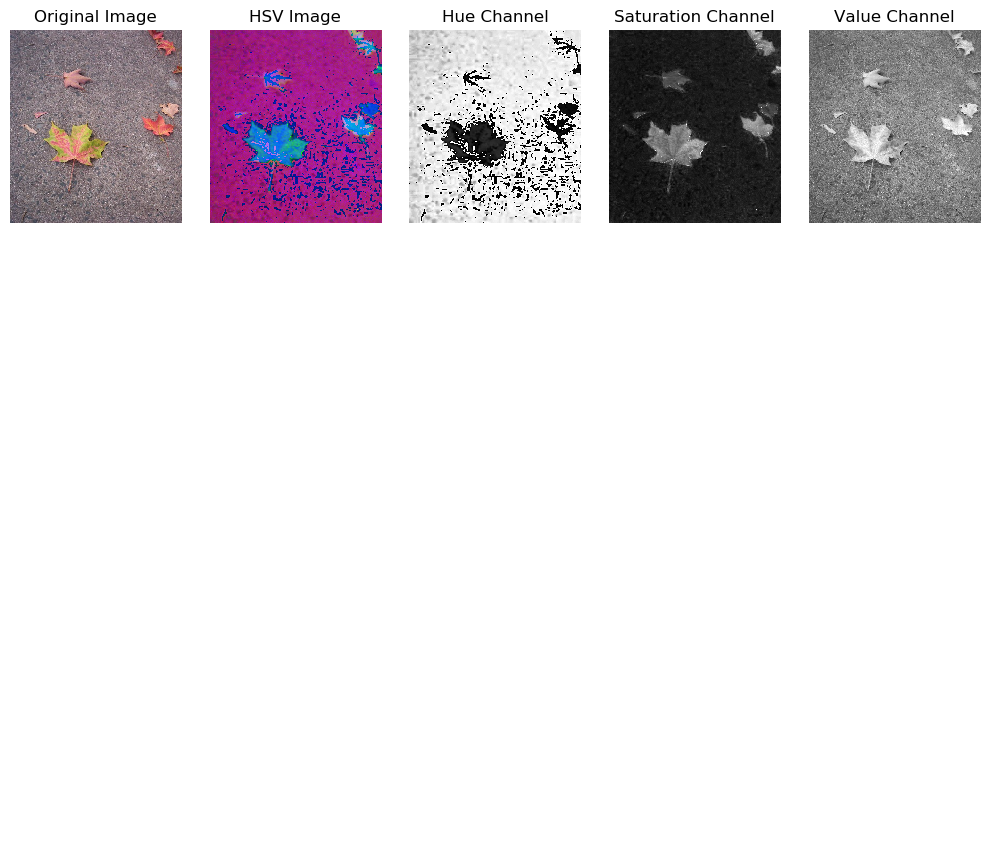

In [3]:
##  BIG MICH

img = cv2.imread('leaves.jpg')

cv2.imshow("image Leaves ", img)

imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHue = imgHSV[:, :, 0]
imgSat = imgHSV[:, :, 1]
imgVal= imgHSV[:, :, 2]

fig, axes = plt.subplots(2, 5, figsize=(10, 10))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')

# HSV Image
axes[0, 1].imshow(imgHSV, cmap='hsv')
axes[0, 1].set_title('HSV Image')

# Hue Channel
axes[0, 2].imshow(imgHue, cmap='gray')
axes[0, 2].set_title('Hue Channel')

# Saturation Channel
axes[0, 3].imshow(imgSat, cmap='gray')
axes[0, 3].set_title('Saturation Channel')

# Value Channel
# Normalize the Value channel to be between 0 and 1
imgVal_normalized = imgVal / 255.0
axes[0, 4].imshow(imgVal_normalized, cmap='gray')
axes[0, 4].set_title('Value Channel')

# Remove axis labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


With the image read and converted to HSV format, the next step is to apply a mask of threshold values. 

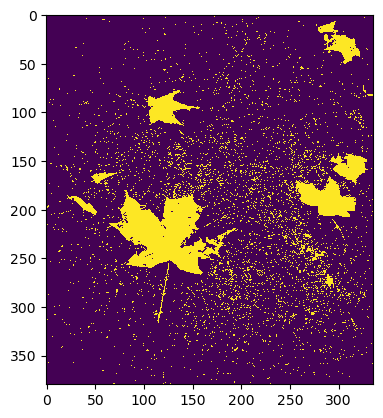

In [15]:
ret, mask = cv2.threshold(imgVal, 170, 255,cv2.THRESH_BINARY)
plt.imshow( mask)


From comparing the hue saturation and intensity value elements, intensity value held the most promise in being able to isolate the leaves from the background and capture all the loose leaf fragments on the ground. 

The next step is to create a structured element to use for erosion and dilation to perform morphology. This is done using the getStructuringElement functiion found in the openCV libraries. 

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

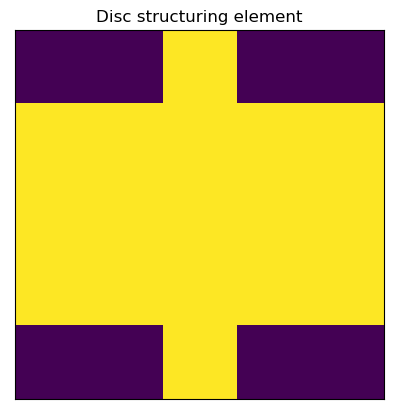

In [17]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print(disc)
fig = plt.figure();
plt.subplot(111), plt.imshow(disc), plt.title("Disc structuring element")
plt.xticks([]), plt.yticks([])

From here we perform Erosion.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

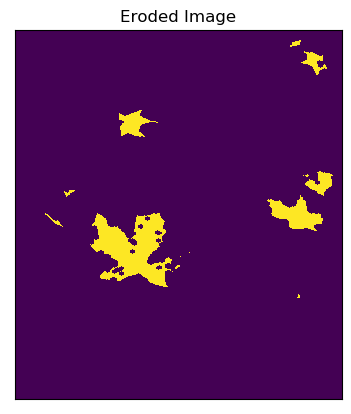

In [16]:
eroded = cv2.erode(mask, disc)
plt.imshow(eroded), plt.title("Eroded Image")
plt.xticks([]), plt.yticks([])

With Erosion now performed, it can be seen that most of the remaining noise has been filtered from the masked binary image. Now let's observe the effects of dilation on the same masked binary image. The code below performs image dilation.  

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

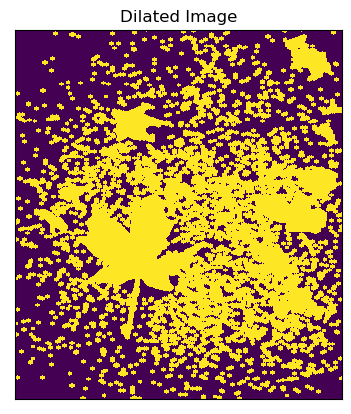

In [20]:
dilated = cv2.dilate(mask, disc)
plt.imshow(dilated), plt.title("Dilated Image")
plt.xticks([]), plt.yticks([])

In [ ]:
#waits for user to press a key
cv2.waitKey(0)
cv2.destroyAllWindows()